# APRENDIZAJE POR REFUERZO

## Entorno GridWorlds: Estados, Acciones y Recompensas

En este entorno, el agente se desplaza sobre una cuadrícula donde cada casilla representa un estado. Puede moverse en cuatro direcciones (arriba, abajo, izquierda, derecha), aunque algunas casillas restringen el movimiento o afectan la recompensa. Las recompensas y restricciones dependen del tipo de casilla:

- **Negro:** Casilla vacía, sin recompensa.
- **Blanco:** Foso, gran penalización y termina el episodio.
- **Púrpura:** Muro, el agente no puede entrar.
- **Negro con flecha gris:** Solo permite moverse en una dirección.
- **Rojo:** Penalización (recompensa negativa).
- **Verde:** Meta o bonificación (recompensa positiva).
- **Amarillo:** Arena movediza; 90% de las acciones fallan.
- **Azul:** Posición actual del agente.
- **Flecha naranja:** Última acción realizada.
- **Punto naranja:** El agente no se movió tras la última acción (acción inválida).

El objetivo del agente es aprender a llegar a la meta (verde) maximizando la recompensa total y evitando fosos y penalizaciones.


#INTEGRANTES DEL GRUPO:

 * Amurrio Huaygua Karen
 * Manjon Blanco Susana

In [1]:
# Instala gym_gridworlds directamente desde GitHub
!pip install git+https://github.com/sparisi/gym_gridworlds.git



  Cloning https://github.com/sparisi/gym_gridworlds.git to /tmp/pip-req-build-c2_e4c3b
  Running command git clone --filter=blob:none --quiet https://github.com/sparisi/gym_gridworlds.git /tmp/pip-req-build-c2_e4c3b
  Resolved https://github.com/sparisi/gym_gridworlds.git to commit 720cc8e7ac1a2f80234ba4082f2063e894e9a33c
  Preparing metadata (setup.py) ... done
  Created wheel for Gym-Gridworlds: filename=Gym_Gridworlds-1.0-py3-none-any.whl size=15679 sha256=129b48397ecdf64af33097eeb0d33ecf6476cf05b876fac576b21d49e26cec26
  Stored in directory: /tmp/pip-ephem-wheel-cache-s8mk91l2/wheels/5e/53/bd/f04c982a026f7f1a41035c5d022ca6c53491085b3420959bd8
Successfully built Gym-Gridworlds


## Métodos de acción-valor

El agente estima el valor esperado de cada accion con base a las recompensas que ha recibido.
siempre busca elegir la mejor accion a tomar de acuerdo a la mejor recompensa que recibe.
* Si epsilon es grande -> mas probabilidad de explorar
* Si epsilon es pequeño -> mas probabilidad de explotar


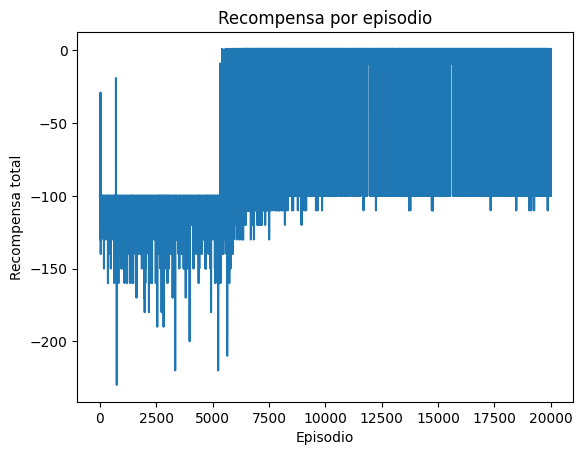

Entrenamiento terminado.


In [3]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt

env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n

alpha = 0.8
gamma = 0.95
epsilon = 1.0
episodes = 20000
epsilon_end = 0.05
epsilon_decay = 0.9995

Q = np.zeros((n_states, n_actions))
rewards_ep = []

for ep in range(episodes):
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        # Forzar exploración los primeros 5,000 episodios
        if ep < 5000 or np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[obs])
        next_obs, reward, terminated, truncated, info = env.step(action)
        # Gran recompensa si llega a la meta
         #Se da la recompen
        Q[obs, action] += alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        obs = next_obs
        done = terminated or truncated
        total_reward += reward
    # Decaimiento lento
    if ep >= 5000:
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
    rewards_ep.append(total_reward)

env.close()
plt.plot(rewards_ep)
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Recompensa por episodio")
plt.show()
print("Entrenamiento terminado.")

# Visualización: GREEDY (camino óptimo)
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset()
frames = [env.render()]
done = False
while not done:
    action = np.argmax(Q[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    done = terminated or truncated

env.close()

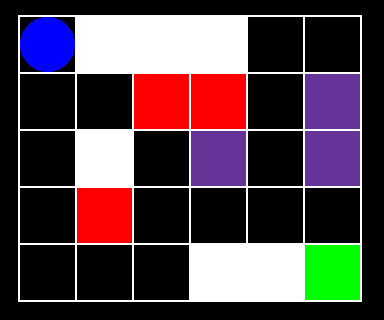

In [4]:
# Opcional: guarda GIF
import imageio
imageio.mimsave('gridworld_greedy.gif', frames, duration=0.1)
from IPython.display import Image
Image(filename="gridworld_greedy.gif")

In [ ]:
total_rewards = []

for ep in range(episodes):
    obs, info = env.reset(seed=ep)   # Puedes variar o quitar el seed si prefieres aleatoriedad
    done = False
    total_reward = 0
    llego_meta = False

    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[obs])
        next_obs, reward, terminated, truncated, info = env.step(action)
        Q[obs, action] += alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        total_reward += reward

        # Verifica si llegó a la meta (terminated y recompensa positiva)
        if terminated and reward > 0:
            llego_meta = True

        obs = next_obs
        done = terminated or truncated

    epsilon = max(epsilon_end, epsilon * epsilon_decay)

    # ---- IMPRIME RESULTADO DEL EPISODIO ----
    if llego_meta:
        print(f"Episodio {ep+1}: ¡GANÓ! Recompensa total: {total_reward}")
    else:
        print(f"Episodio {ep+1}: PERDIÓ o NO LLEGÓ. Recompensa total: {total_reward}")

    total_rewards.append(total_reward)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Episodio 15001: ¡GANÓ! Recompensa total: 1.0
Episodio 15002: ¡GANÓ! Recompensa total: 1.0
Episodio 15003: ¡GANÓ! Recompensa total: 1.0
Episodio 15004: ¡GANÓ! Recompensa total: 1.0
Episodio 15005: ¡GANÓ! Recompensa total: 1.0
Episodio 15006: ¡GANÓ! Recompensa total: 1.0
Episodio 15007: ¡GANÓ! Recompensa total: 1.0
Episodio 15008: ¡GANÓ! Recompensa total: 1.0
Episodio 15009: PERDIÓ o NO LLEGÓ. Recompensa total: -100.0
Episodio 15010: ¡GANÓ! Recompensa total: 1.0
Episodio 15011: ¡GANÓ! Recompensa total: 1.0
Episodio 15012: ¡GANÓ! Recompensa total: 1.0
Episodio 15013: ¡GANÓ! Recompensa total: 1.0
Episodio 15014: ¡GANÓ! Recompensa total: 1.0
Episodio 15015: ¡GANÓ! Recompensa total: 1.0
Episodio 15016: ¡GANÓ! Recompensa total: 1.0
Episodio 15017: ¡GANÓ! Recompensa total: 1.0
Episodio 15018: ¡GANÓ! Recompensa total: 1.0
Episodio 15019: ¡GANÓ! Recompensa total: 1.0
Episodio 15020: ¡GANÓ! Recompensa total: 1.0
Episodio 15021: ¡G

## Implementación incremental

Permite actualizar el promedio usando solo el valor anterior y la nueva recompensa

La fórmula que pusiste es:

𝑄
𝑛
+
1
=
𝑄
𝑛
+
𝛼
(
𝑅
𝑛
−
𝑄
𝑛
)
Q
n+1
​
 =Q
n
​
 +α(R
n
​
 −Q
n
​
 )
Donde:

𝑄
𝑛
Q
n
​
  = valor estimado después de n actualizaciones

𝑅
𝑛
R
n
​
  = recompensa obtenida en la vez n

𝛼
α = tasa de aprendizaje (learning rate), entre 0 y 1

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Episodio 6260, paso 26: Recompensa = 1.0, Estado = 29
Episodio 6261, paso 13: Recompensa = -100, Estado = 27
Episodio 6262, paso 26: Recompensa = 1.0, Estado = 29
Episodio 6263, paso 1: Recompensa = -100, Estado = 1
Episodio 6264, paso 7: Recompensa = -10.0, Estado = 20
Episodio 6264, paso 17: Recompensa = 1.0, Estado = 29
Episodio 6265, paso 5: Recompensa = -100, Estado = 1
Episodio 6266, paso 1: Recompensa = -100, Estado = 1
Episodio 6267, paso 10: Recompensa = -100, Estado = 13
Episodio 6268, paso 11: Recompensa = -100, Estado = 27
Episodio 6269, paso 5: Recompensa = -100, Estado = 13
Episodio 6270, paso 6: Recompensa = -100, Estado = 13
Episodio 6271, paso 0: Recompensa = -100, Estado = 1
Episodio 6272, paso 1: Recompensa = -100, Estado = 1
Episodio 6273, paso 20: Recompensa = 1.0, Estado = 29
Episodio 6274, paso 12: Recompensa = -100, Estado = 27
Episodio 6275, paso 5: Recompensa = -100, Estado = 1
Episodio 6276, p

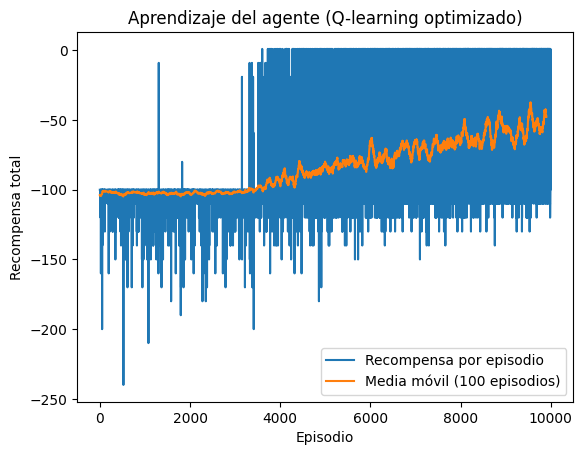

In [ ]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Configuración del entorno
env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
alpha = 0.1              # Tasa de aprendizaje
gamma = 0.99             # Factor de descuento
episodes = 10000         # Aumentamos el número de episodios
max_steps = 100          # Máximo de pasos por episodio
epsilon_start = 1.0      # Epsilon inicial (exploración total)
epsilon_end = 0.01       # Epsilon final (mínima exploración)
epsilon_decay = 0.999    # Decaimiento de epsilon por episodio

# Inicialización del entorno y la tabla Q
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))

rewards_ep = []

# Entrenamiento
for ep in range(episodes):
    obs, info = env.reset(seed=ep)
    done = False
    total_reward = 0
    # Decaimiento de epsilon
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-ep / (episodes * epsilon_decay))

    for t in range(max_steps):
        # Política ε-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Exploración
        else:
            action = np.argmax(Q[obs])         # Explotación
        # Paso en el entorno
        next_obs, reward, terminated, truncated, info = env.step(action)
        # Actualización de la tabla Q
        Q[obs, action] = Q[obs, action] + alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        obs = next_obs
        total_reward += reward
        # Depuración: Imprimir recompensa y estado
        if reward != 0:
            print(f"Episodio {ep}, paso {t}: Recompensa = {reward}, Estado = {obs}")
        if terminated or truncated:
            break
    rewards_ep.append(total_reward)
    # Imprimir progreso cada 1000 episodios
    if (ep + 1) % 1000 == 0:
        print(f"Episodio {ep + 1}, Recompensa media (últimos 100): {np.mean(rewards_ep[-100:]):.2f}, Epsilon: {epsilon:.3f}")

env.close()
print("Entrenamiento terminado con implementación incremental (Q-learning optimizado).")

# --- Gráfica de recompensas ---
plt.plot(rewards_ep, label="Recompensa por episodio")
plt.plot(np.convolve(rewards_ep, np.ones(100)/100, mode='valid'), label="Media móvil (100 episodios)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Aprendizaje del agente (Q-learning optimizado)")
plt.legend()
plt.show()


In [ ]:

# --- Visualización del recorrido greedy aprendido ---
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset(seed=42)
frame2 = [env.render()]
path = [obs]  # Para rastrear los estados visitados
for paso in range(1, 101):
    action = np.argmax(Q[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    frame2.append(env.render())
    path.append(obs)
env.close()



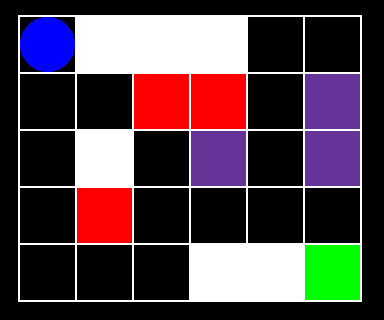

In [ ]:
# Guardar y mostrar el GIF
imageio.mimsave('gridworld_optimized.gif', frame2, duration=0.1)
from IPython.display import Image
Image(filename="gridworld_optimized.gif")

# Valores iniciales optimistas

* Este valor inicial influye en cómo aprende el agente al principio, porque afecta qué acciones explora o explota.

* En vez de iniciar Q(a) en cero, ponemos todos los valores iniciales en un valor alto, más alto de lo que esperaríamos recibir realmente.

  Como el agente piensa que todas las acciones son “muy buenas”, las irá probando todas para comprobar si realmente lo son.

* El agente se queda con la mejor, y explota esa acción.


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Episodio 7336, paso 20: Recompensa = -10.0, Estado = 14
Episodio 7336, paso 31: Recompensa = -100, Estado = 28
Episodio 7336 terminó sin meta (trampa o límite), Estado = 28
Episodio 7337, paso 3: Recompensa = -100, Estado = 13
Episodio 7337 terminó sin meta (trampa o límite), Estado = 13
Episodio 7338, paso 10: Recompensa = -100, Estado = 27
Episodio 7338 terminó sin meta (trampa o límite), Estado = 27
Episodio 7339, paso 19: Recompensa = 1.0, Estado = 29
Episodio 7340, paso 28: Recompensa = 1.0, Estado = 29
Episodio 7341, paso 23: Recompensa = 1.0, Estado = 29
Episodio 7342, paso 4: Recompensa = -100, Estado = 13
Episodio 7342 terminó sin meta (trampa o límite), Estado = 13
Episodio 7343, paso 6: Recompensa = -100, Estado = 13
Episodio 7343 terminó sin meta (trampa o límite), Estado = 13
Episodio 7344, paso 19: Recompensa = -100, Estado = 28
Episodio 7344 terminó sin meta (trampa o límite), Estado = 28
Episodio 7345, p

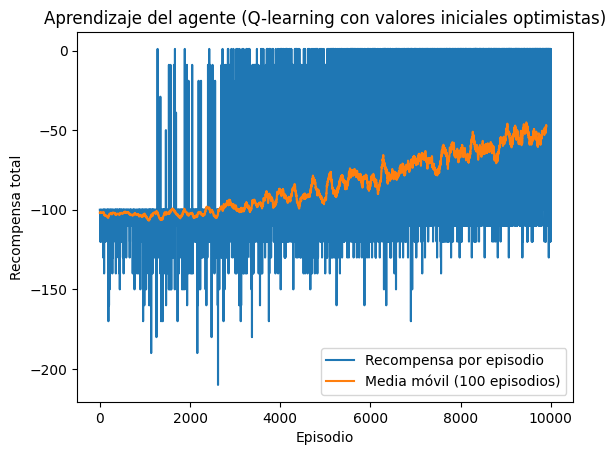

In [ ]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Parámetros
env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
alpha = 0.2              # Tasa de aprendizaje reducida para estabilidad
gamma = 0.99             # Factor de descuento
Q_init = 1.0             # Valor inicial optimista más moderado
episodes = 10000         # Número de episodios
max_steps = 100          # Máximo de pasos por episodio
epsilon_start = 1.0      # Epsilon inicial (exploración total)
epsilon_end = 0.01       # Epsilon final (mínima exploración)
epsilon_decay = 0.999    # Decaimiento de epsilon por episodio

# Inicialización del entorno y la tabla Q
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.ones((n_states, n_actions)) * Q_init  # Valores iniciales optimistas

rewards_ep = []  # Para almacenar las recompensas por episodio

# Entrenamiento
for ep in range(episodes):
    obs, info = env.reset(seed=42 + ep)
    done = False
    total_reward = 0
    # Decaimiento de epsilon
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-ep / (episodes * epsilon_decay))

    for t in range(max_steps):
        # Política ε-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Exploración
        else:
            action = np.argmax(Q[obs])         # Explotación
        # Paso en el entorno
        next_obs, reward, terminated, truncated, info = env.step(action)
        # Actualización incremental de Q
        Q[obs, action] += alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        obs = next_obs
        total_reward += reward
        # Depuración: Imprimir recompensas no nulas
        if reward != 0:
            print(f"Episodio {ep}, paso {t}: Recompensa = {reward}, Estado = {obs}")
        if terminated or truncated:
            if terminated and reward <= 0:
                print(f"Episodio {ep} terminó sin meta (trampa o límite), Estado = {obs}")
            break
    rewards_ep.append(total_reward)
    # Imprimir progreso cada 1000 episodios
    if (ep + 1) % 1000 == 0:
        print(f"Episodio {ep + 1}, Recompensa media (últimos 100): {np.mean(rewards_ep[-100:]):.2f}, Epsilon: {epsilon:.3f}")

env.close()
print("Entrenamiento terminado con valores iniciales optimistas.")

# --- Gráfica de recompensas ---
plt.plot(rewards_ep, label="Recompensa por episodio")
plt.plot(np.convolve(rewards_ep, np.ones(100)/100, mode='valid'), label="Media móvil (100 episodios)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Aprendizaje del agente (Q-learning con valores iniciales optimistas)")
plt.legend()
plt.show()



In [ ]:
# --- Visualización del recorrido greedy aprendido ---
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset(seed=42)
frame3 = [env.render()]
path = [obs]  # Para rastrear los estados visitados
for paso in range(100):
    action = np.argmax(Q[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    frame3.append(env.render())
    path.append(obs)
    if reward > 0:
        print(f"¡Llegó a la meta en el paso {paso + 1}!\nRuta: {path}")
        break
    if terminated or truncated:
        print(f"Terminó sin llegar a la meta en el paso {paso + 1}.\nRuta: {path}")
        break
env.close()



¡Llegó a la meta en el paso 12!
Ruta: [np.int64(0), np.int64(6), np.int64(12), np.int64(18), np.int64(24), np.int64(25), np.int64(26), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(29), np.int64(29)]


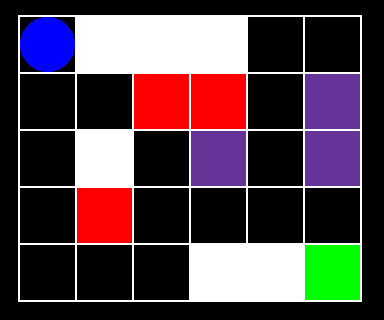

In [ ]:
# Guardar y mostrar el GIF
imageio.mimsave('gridworld_optimista.gif', frame3, duration=0.5)
from IPython.display import Image
Image(filename="gridworld_optimista.gif")

# Intervalo de confianza

Priorizar acciones que han sido menos exploradas, pero que pueden ser muy buenas.


El agente balancea explotación y exploración, pero de forma dirigida:

* Explora más las acciones de las que menos sabe.

* Explota las que han demostrado ser buenas.

Episodio 0, paso 0: Estado (0,0), Acción 0, Recompensa 0.0
Episodio 0, paso 14: Estado (3,3), Acción 0, Recompensa -10.0
Episodio 0, paso 16: Estado (2,3), Acción 2, Recompensa -100
Episodio 0 terminó sin meta (trampa o límite), Último estado: 13, Ruta: [np.int64(0), np.int64(0), np.int64(6), np.int64(6), np.int64(12), np.int64(12), np.int64(18), np.int64(18), np.int64(24), np.int64(24), np.int64(24), np.int64(25), np.int64(24), np.int64(18), np.int64(19), np.int64(18), np.int64(12), np.int64(13)]
Episodio 1, paso 0: Estado (0,1), Acción 2, Recompensa -100
Episodio 1 terminó sin meta (trampa o límite), Último estado: 1, Ruta: [np.int64(0), np.int64(1)]
Episodio 2, paso 0: Estado (0,0), Acción 3, Recompensa 0.0
Episodio 2, paso 16: Estado (2,3), Acción 1, Recompensa -100
Episodio 2 terminó sin meta (trampa o límite), Último estado: 13, Ruta: [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(6), np.int64(7), np.int64(6), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.

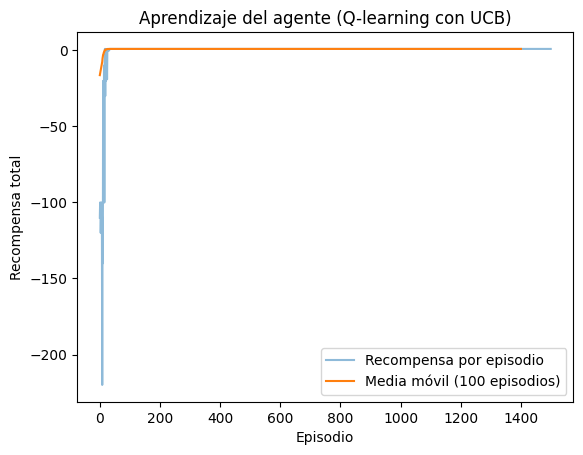

Tabla Q final (valores Q por estado y acción):
Estado (0,0): [ 9.35891349e-04  6.66728302e+01 -1.00000000e+01  9.35891349e-04
  9.35891349e-04]
Estado (0,1): [0. 0. 0. 0. 0.]
Estado (0,2): [0. 0. 0. 0. 0.]
Estado (0,3): [0. 0. 0. 0. 0.]
Estado (0,4): [-1.00000000e+01  6.18048433e-06  0.00000000e+00  9.41480149e-08
  9.41480149e-08]
Estado (1,0): [9.41480149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Estado (1,1): [9.38833316e-04 6.75772123e+01 5.92334131e-04 7.05420110e-04
 9.38833316e-04]
Estado (1,2): [ 8.61717019e-04 -1.00000000e+01 -5.17770000e-01 -1.00000000e+01
  5.80988752e-04]
Estado (1,3): [ -3.439     -3.439     -2.71     -10.        -2.997001]
Estado (1,4): [ -2.097901  -1.999     -2.71     -10.        -1.999   ]
Estado (2,0): [-1.88100000e-01  1.49721376e-04  6.18048433e-06  9.41480149e-08
  6.18048433e-06]
Estado (2,1): [0. 0. 0. 0. 0.]
Estado (2,2): [ 8.84921361e-04  6.84907295e+01 -1.00000000e+01  6.22419275e-04
  8.84921361e-04]
Estado (2,3): [0. 

In [ ]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Parámetros
env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
alpha = 0.1              # Tasa de aprendizaje reducida para estabilidad
gamma = 0.99             # Factor de descuento
c = 0.5                  # Parámetro UCB reducido para equilibrar exploración
episodes = 1500         # Más episodios para asegurar aprendizaje
max_steps = 200          # Más pasos por episodio
epsilon = 0.1            # Exploración ε-greedy adicional como respaldo

# Inicialización del entorno
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))  # Tabla Q inicializada en 0
acciones = np.ones((n_states, n_actions))  # Conteo inicial de acciones
rewards_ep = []  # Para almacenar las recompensas por episodio

# Entrenamiento
# ... (todo igual hasta el bucle del entrenamiento)

for ep in range(episodes):
    obs, info = env.reset(seed=42 + ep)
    total_reward = 0
    states_visited = [obs]
    for t in range(max_steps):
        # Selección de acción SOLO con UCB
        ucb_values = Q[obs] + c * np.sqrt(np.log(np.sum(acciones[obs]) + 1) / (acciones[obs] + 1e-6))
        action = np.argmax(ucb_values)
        # Paso y actualización igual que antes
        next_obs, reward, terminated, truncated, info = env.step(action)
        acciones[obs, action] += 1
        Q[obs, action] += alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        obs = next_obs
        total_reward += reward
        states_visited.append(obs)
        # Debug (igual)
        if reward != 0 or t % 50 == 0:
            fila, columna = divmod(obs, 5)
            print(f"Episodio {ep}, paso {t}: Estado ({fila},{columna}), Acción {action}, Recompensa {reward}")
        if terminated or truncated:
            if terminated and reward <= 0:
                print(f"Episodio {ep} terminó sin meta (trampa o límite), Último estado: {obs}, Ruta: {states_visited}")
            elif reward > 0:
                print(f"Episodio {ep} llegó a la meta, Último estado: {obs}, Ruta: {states_visited}")
            break
    rewards_ep.append(total_reward)
    if (ep + 1) % 1000 == 0:
        print(f"Episodio {ep + 1}, Recompensa media (últimos 100): {np.mean(rewards_ep[-100:]):.2f}")


env.close()
print("Entrenamiento terminado con UCB.")

# --- Gráfica de recompensas ---
plt.plot(rewards_ep, label="Recompensa por episodio", alpha=0.5)
plt.plot(np.convolve(rewards_ep, np.ones(100)/100, mode='valid'), label="Media móvil (100 episodios)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Aprendizaje del agente (Q-learning con UCB)")
plt.legend()
plt.show()

# --- Inspección de la tabla Q ---
print("Tabla Q final (valores Q por estado y acción):")
for state in range(n_states):
    fila, columna = divmod(state, 5)
    print(f"Estado ({fila},{columna}): {Q[state]}")
print("Conteo de acciones por estado:")
for state in range(n_states):
    fila, columna = divmod(state, 5)
    print(f"Estado ({fila},{columna}): {acciones[state]}")



In [ ]:
# --- Visualización del recorrido greedy aprendido ---
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset(seed=42)
frame4 = [env.render()]
path = [(obs, None, None)]  # (estado, acción, recompensa)
for paso in range(1, 101):
    action = np.argmax(Q[obs])
    obs_old = obs
    obs, reward, terminated, truncated, info = env.step(action)
    frame4.append(env.render())
    fila, columna = divmod(obs_old, 5)
    print(f"Paso {paso}: Estado ({fila},{columna}), Acción {action}, Nuevo Estado {obs}, Recompensa {reward}")
    path.append((obs, action, reward))
    if reward > 0:
        print(f"¡Llegó a la meta en el paso {paso}!\nRuta: {[(s, a, r) for s, a, r in path]}")
        break
    if terminated or truncated:
        print(f"Terminó sin llegar a la meta en el paso {paso}.\nRuta: {[(s, a, r) for s, a, r in path]}")
        break
env.close()



Paso 1: Estado (0,0), Acción 1, Nuevo Estado 6, Recompensa 0.0
Paso 2: Estado (1,1), Acción 1, Nuevo Estado 12, Recompensa 0.0
Paso 3: Estado (2,2), Acción 1, Nuevo Estado 18, Recompensa 0.0
Paso 4: Estado (3,3), Acción 1, Nuevo Estado 24, Recompensa 0.0
Paso 5: Estado (4,4), Acción 2, Nuevo Estado 25, Recompensa 0.0
Paso 6: Estado (5,0), Acción 2, Nuevo Estado 26, Recompensa 0.0
Paso 7: Estado (5,1), Acción 3, Nuevo Estado 20, Recompensa 0.0
Paso 8: Estado (4,0), Acción 2, Nuevo Estado 21, Recompensa 0.0
Paso 9: Estado (4,1), Acción 2, Nuevo Estado 22, Recompensa 0.0
Paso 10: Estado (4,2), Acción 2, Nuevo Estado 23, Recompensa 0.0
Paso 11: Estado (4,3), Acción 1, Nuevo Estado 29, Recompensa 0.0
Paso 12: Estado (5,4), Acción 4, Nuevo Estado 29, Recompensa 1.0
¡Llegó a la meta en el paso 12!
Ruta: [(np.int64(0), None, None), (np.int64(6), np.int64(1), 0.0), (np.int64(12), np.int64(1), 0.0), (np.int64(18), np.int64(1), 0.0), (np.int64(24), np.int64(1), 0.0), (np.int64(25), np.int64(2), 0

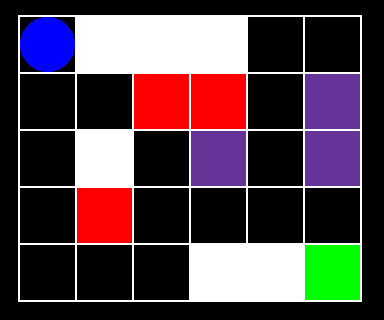

In [ ]:
# Guardar y mostrar el GIF
imageio.mimsave('gridworld_ucb_debug.gif', frame4, duration=0.5)
from IPython.display import Image
Image(filename="gridworld_ucb_debug.gif")

## Algoritmos de Gradiente

 El agente aprende una “preferencia” para cada acción.
 El agente elige una acción al azar usando las probabilidades calculadas con softmax
 * El explorador y explotador a la vez, porque siempre existe una probabilidad de elegir cualquier acción (softmax nunca es cero).


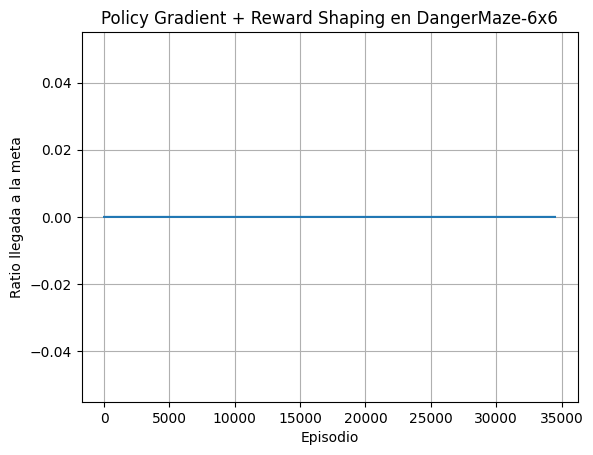

In [ ]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import imageio

def softmax(x):
    x = x - np.max(x)
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

# Parámetros
env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
episodes = 35000
max_steps = 200
alpha = 0.2
beta = 0.2
gamma = 1.0
epsilon = 0.2

env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
H = np.random.uniform(-0.01, 0.01, size=(n_states, n_actions))
baseline = 0

rewards_ep = []
success_rate = np.zeros(episodes)

for ep in range(episodes):
    obs, info = env.reset(seed=int(ep))
    trajectory = []
    total_reward = 0
    last_obs = None
    for t in range(max_steps):
        pi = softmax(H[obs])
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.random.choice(np.arange(n_actions), p=pi)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # REWARD SHAPING: Penaliza quedarse quieto (si repite estado, penaliza extra)
        if last_obs is not None and next_obs == last_obs:
            reward -= 0.1  # Penaliza por no moverse

        # Si quiere, se puede dar una pequeña recompensa por avanzar hacia meta
        # (opcional, quitar si no quieres hacer shaping extra)
        # if next_obs > obs:
        #     reward += 0.01

        trajectory.append((obs, action, reward))
        total_reward += reward
        last_obs = obs
        obs = next_obs
        if terminated or truncated:
            break

    # Calcula retornos acumulados
    G = 0
    returns = []
    for _, _, reward in reversed(trajectory):
        G = reward + gamma * G
        returns.insert(0, G)

    baseline += 0.01 * (total_reward - baseline)

    for idx, (obs_step, action_step, _) in enumerate(trajectory):
        Gt = returns[idx]
        pi = softmax(H[obs_step])
        for a in range(n_actions):
            entropy_grad = -beta * (np.log(pi[a] + 1e-8) + 1)
            grad = alpha * (Gt - baseline)
            if a == action_step:
                H[obs_step, a] += grad * (1 - pi[a]) + entropy_grad
            else:
                H[obs_step, a] -= grad * pi[a] + entropy_grad

    rewards_ep.append(total_reward)
    if any(r > 0 for _, _, r in trajectory):
        success_rate[ep] = 1

env.close()

# Graficar el ratio de éxito (media móvil)
window = 500
if len(success_rate) >= window:
    avg_success = np.convolve(success_rate, np.ones(window)/window, mode='valid')
    plt.plot(avg_success)
    plt.xlabel('Episodio')
    plt.ylabel('Ratio llegada a la meta')
    plt.title('Policy Gradient + Reward Shaping en DangerMaze-6x6')
    plt.grid(True)
    plt.show()
else:
    print("No hay suficientes episodios para calcular la media móvil.")


In [ ]:

# --- Visualización del recorrido greedy final ---
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset(seed=42)
frames = [env.render()]
path = [(obs, None, None)]
for paso in range(1, 201):
    action = np.argmax(H[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    path.append((obs, action, reward))
    if reward > 0 or terminated or truncated:
        break
env.close()

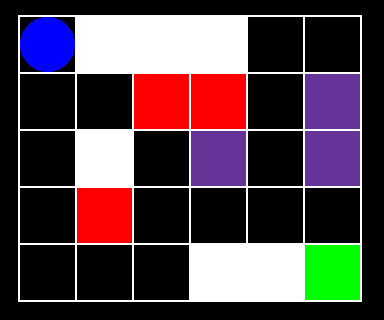

In [ ]:
imageio.mimsave('dangermaze_gradient.gif', frames, duration=0.25)
from IPython.display import Image
Image(filename="dangermaze_gradient.gif")